In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


finished


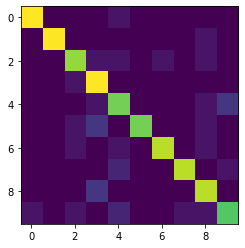

In [16]:
labels = np.loadtxt("Train/Training Labels.txt", dtype=int)
labels = np.eye(10, dtype=int)[labels]
labels = labels*2 -1
index =0
imageMatrix = []
for i in range (0,2400): # each of the 2400 tranning pictures
    img = Image.open("Train/%d.jpg"%(i+1))
    imageMatrix.append(np.array(img).reshape(-1))
    
for n in [1,10**-1,10**-2,10**-3,10**-4,10**-5,10**-6,10**-7,10**-8,10**-9]: 
    weights = np.zeros((10, 28*28)) # intialise the first ten classifiers each having the size of the image
    for i in range(10): # intial weight vector in each of the classifiers by 1
        weights[i][0] = 1
    for c in range(0,10): # for each of the 10 classifiers
        for epoch in range(0,500): # limit of 500 iterations
            for i in range (0,2400): # each of the 2400 tranning pictures
                r=0
                if np.dot(weights[c],imageMatrix[i])>=0: 
                    r=1 
                else:
                    r=-1
                if r!= labels[i][c]:
                    weights[c] += n*imageMatrix[i]*labels[i][c]
    #test
    tdata = np.zeros((200, 28*28))
    for i in range(1, 201):
        im = Image.open("Test/%d.jpg"%(i))
        tdata[i-1] = np.array(im).reshape( -1)
    tlabels = np.loadtxt("Test/Test Labels.txt", dtype=int)
    tlabels = np.eye(10, dtype=int)[tlabels]
    tlabels = tlabels*2 -1

    preds = tdata.dot(weights.transpose())
    conf_mat = np.zeros((10, 10))
    preds_num = preds.argmax(axis=1)
    tlabels_num = tlabels.argmax(axis=1)
    
    # confusion matrix
    for i in range(preds_num.shape[0]):
        conf_mat[tlabels_num[i], preds_num[i]] += 1
    plt.imshow(conf_mat)
    plt.savefig("Confusion%d.jpg"%(index))
    index +=1 
    
print("finished")
